In [1]:
import tensorflow as tf

In [2]:
const_1 = tf.constant(value=[5.0], 
                      dtype=tf.float32, 
                      shape=(1,), 
                      name='const_1', 
                      verify_shape=True)

print(const_1)

Tensor("const_1:0", shape=(1,), dtype=float32)


In [3]:
var_1 = tf.Variable(initial_value=[1.0],
                    trainable=True,
                    collections=None,
                    validate_shape=True,
                    caching_device=None,
                    name='var_1',
                    variable_def=None,
                    dtype=tf.float32,
                    expected_shape=(1,),
                    import_scope=None)

print(var_1)

<tf.Variable 'var_1:0' shape=(1,) dtype=float32_ref>


In [4]:
placeholder_1 = tf.placeholder(dtype=tf.float32,
                               shape=(1,),
                               name='placeholder_1')

print(placeholder_1)

Tensor("placeholder_1:0", shape=(1,), dtype=float32)


In [5]:
session = tf.Session()

In [6]:
print(session.run(const_1))

[5.]


In [7]:
init = tf.global_variables_initializer() # required if you have variable nodes
session.run(init)

print(session.run(var_1))

[1.]


In [8]:
# Running multiple sessions

print(session.run([const_1, var_1]))

[array([5.], dtype=float32), array([1.], dtype=float32)]


In [9]:
print(session.run(placeholder_1, feed_dict={placeholder_1: [10.0]})) # need to match shape

[10.]


In [10]:
result = const_1 + 5
print(session.run(result))

[10.]


In [11]:
result = tf.add(const_1, 5, name='add_node') # This is the better option
print(result)

Tensor("add_node:0", shape=(1,), dtype=float32)


In [12]:
result = placeholder_1 + 10
print(session.run(result, feed_dict={placeholder_1: [10]}))

[20.]


In [13]:
# Linear Regression

# y = mx + b

In [14]:
from matplotlib import pyplot as plt

x_train = [0.0, 1.0, 2.0, 3.0]
y_train = [1.0, 2.0, 3.0, 4.0]


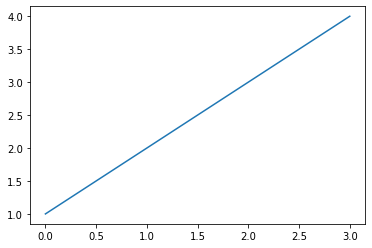

In [15]:
plt.plot(x_train, y_train)
plt.show()

In [16]:
# y = mx + b

m = tf.Variable(initial_value=[0.5], dtype=tf.float32)
b = tf.Variable(initial_value=[0.5], dtype=tf.float32)

In [17]:
x_input = tf.placeholder(dtype=tf.float32)
y_input = tf.placeholder(dtype=tf.float32)

In [18]:
y_output = tf.add(tf.multiply(m, x_input), b)

In [19]:
loss = tf.reduce_sum(input_tensor=tf.square(x=y_output - y_input))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_step = optimizer.minimize(loss=loss)

In [20]:
session = tf.Session()
session.run(tf.global_variables_initializer())

print(session.run(loss, feed_dict={x_input: x_train, y_input: y_train}))

for _ in range(1000):
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train})
    
print(session.run([loss, m, b], feed_dict={x_input: x_train, y_input: y_train}))

7.5
[4.465761e-12, array([1.000001], dtype=float32), array([0.9999983], dtype=float32)]


In [21]:
model_output = session.run(y_output, feed_dict={x_input: x_train})

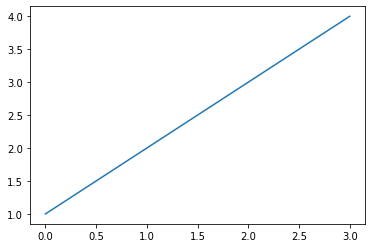

In [22]:
plt.plot(x_train, model_output)
plt.show()